PROJECT PROPOSAL

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source("tests.R")
#source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
player_stats<-read_delim("player_stats.csv")
player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
player_stats_tidy <- player_stats|>
select(Seasons, Age, Plays, "Best Rank", "Current Rank", "Turned Pro")|>
separate(col = "Age",
         into = c("Age", "Birthday","Birth_month", "birth_year"),
        convert = TRUE)|>
separate(col = "Best Rank",
         into = c("Best_Rank", 
                  "best_rank_day", "best_rank_month", "best_rank_year"),
        convert = TRUE)|>
na.omit()
player_stats_tidy

Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Seasons,Age,Birthday,Birth_month,birth_year,Plays,Best_Rank,best_rank_day,best_rank_month,best_rank_year,Current Rank,Turned Pro
<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>
14,32,3,11,1987,Right-handed,44,14,1,2013,178 (280),2005
11,27,21,10,1992,Right-handed,17,11,1,2016,183 (273),2008
5,22,11,2,1997,Right-handed,31,20,1,2020,31 (1398),2015
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,28,12,7,1991,Right-handed,74,19,2,2018,292 (138),2008
8,26,28,7,1993,Right-handed,249,24,12,2018,324 (120),2009
10,26,3,9,1993,Right-handed,4,6,11,2017,5 (5890),2011


In [4]:
max_age<-player_stats_tidy|>
summarise(max_age = max(Age))
max_age

min_age<-player_stats_tidy|>
summarise(min_age = min(Age))
min_age

max_age
<int>
40


min_age
<int>
18


In [5]:
tennis_split <- initial_split(player_stats_tidy, prop = 0.75, strata = "Best_Rank")
tennis_training <- training(tennis_split)
tennis_training <- testing(tennis_split)

tennis_training

Seasons,Age,Birthday,Birth_month,birth_year,Plays,Best_Rank,best_rank_day,best_rank_month,best_rank_year,Current Rank,Turned Pro
<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>
5,22,11,2,1997,Right-handed,31,20,1,2020,31 (1398),2015
1,21,13,8,1998,Right-handed,228,20,1,2020,228 (208),2016
13,29,23,5,1990,Right-handed,32,20,1,2020,32 (1349),2006
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,32,14,1,1988,Left-handed,84,28,9,2015,260 (172),2006
8,26,28,7,1993,Right-handed,249,24,12,2018,324 (120),2009
10,26,3,9,1993,Right-handed,4,6,11,2017,5 (5890),2011


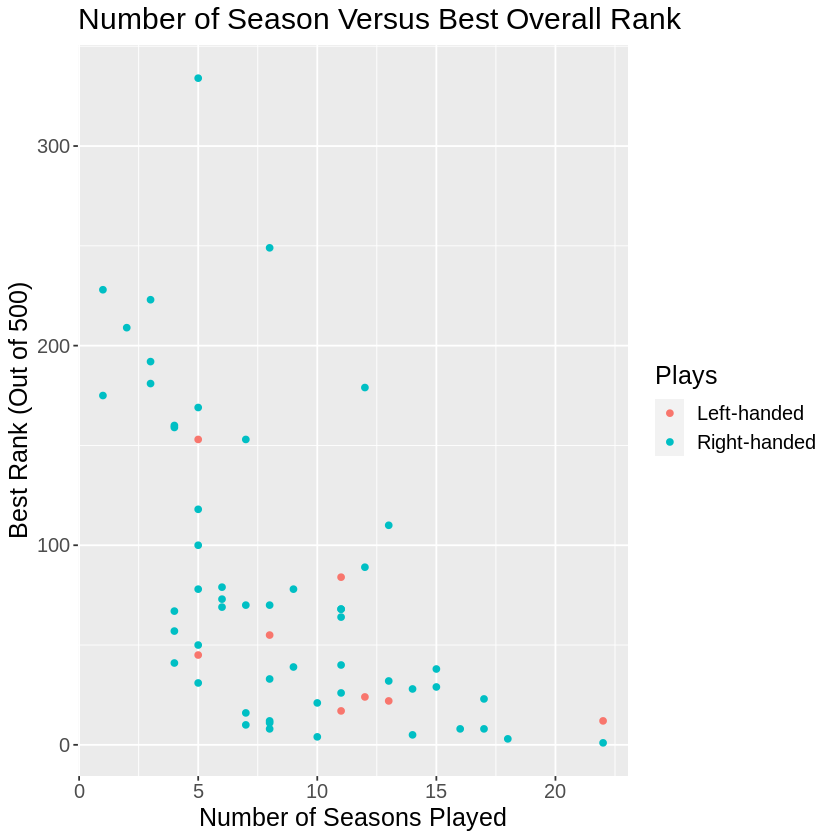

In [6]:
tennis_plot <- tennis_training|>
ggplot(aes(x = Seasons, y = Best_Rank, colour = Plays))+
geom_point()+
labs(title = "Number of Season Versus Best Overall Rank", x = "Number of Seasons Played", y = "Best Rank (Out of 500)",)+
theme(text = element_text(size = 15))
tennis_plot